In [389]:
#standard ds imports
import numpy as np
import pandas as pd

#visualization imports
import matplotlib.pyplot as plt
import seaborn as sns

#stats imports
import scipy.stats as stats

#custom imports
import env
import os

# Hypothesis Testing Overview: Exercises
For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

Has the network latency gone up since we switched internet service providers?
\
\
$H_0$: There is no difference between the network latency now and the network latency before switching internet service provider.\
$H_a$: There is a difference between the network latency now and the network latency before switching internet service provider.
- true positive: There was a difference in network latency between now and previously in both our sample and the population.
- true negative: There was no difference in network latency between now and previously for either our sample or the population.
- type I: We rejected the null hypothesis and found a difference in latency in our sample, however there was no difference in the population.
 - type II: We failed to reject the null hypothesis and found no latency difference in our sample, however there was a difference in the population.

Is the website redesign any good? 
\
\
$H_0$: There is no difference or no increase in user preference between the old website and new.\
$H_a$: There is a measurable increase in user preference between the old website and new.
- true positive: We said there was an increase and there was.
- true negative: We said there was no change or less and it did not increase.
- type I: We said there was an increase, but there was not.
- type II: We said there was no increase, but there was.

Is our television ad driving more sales?
\
\
$H_0$: There is no difference in sales or less after our television ad.\
$H_a$: There is an increase in sales after our television and was run.
- true positive: We said sales increased and they did.
- true negative: We said there was no increase and there was not.
- type I: We said that sales increased, but they did not.
- type II: We said sales increased, but they did.



# Correlation: Exercises

## 1. Answer with the type of stats test you would use (assume normal distribution):
- Is there a relationship between the length of your arm and the length of your foot?\
ANSWER: Pearson's R 
- Does smoking affect when or not someone has lung cancer?\
ANSWER: Chi-Squared
- Is gender independent of a person’s blood type?\
ANSWER: Chi-Squared
- Does whether or not a person has a cat or dog affect whether they live in an apartment?\
ANSWER: Chi-Squared
- Does the length of time of the lecture correlate with a student's grade?\
ANSWER: Pearson's R

## 2. Use the telco_churn data.
- Does tenure correlate with monthly charges?
- Total charges?
- What happens if you control for phone and internet service?

In [414]:
# Write SQL query
query = '''
SELECT *
FROM customers
'''
# Create connection url
my_url = create_url('telco_churn')
# Connect to sql and create dataframe
df = pd.read_sql(query, my_url)

Step-by-Step:

1. State our hypothesis, set alpha value
2. Select the data, run .info
3. Plot the data
4. Test for assumptions: Is there normality?
5. Run stats test
6. Draw Conclusions

### Does tenure correlate with monthly charges?

Form hypotheses and set confidence level:\
$H_0$: There is no linear correlation between tenure and monthly charges.\
$H_a$: There is a linear correlation between tenure and monthly charges.

In [ ]:
# Step 1: set alpha
alpha = 0.05

In [360]:
# Step 2: select data, run .info
charges_df = df[['monthly_charges', 'tenure']]
charges_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   monthly_charges  7043 non-null   float64
 1   tenure           7043 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 110.2 KB


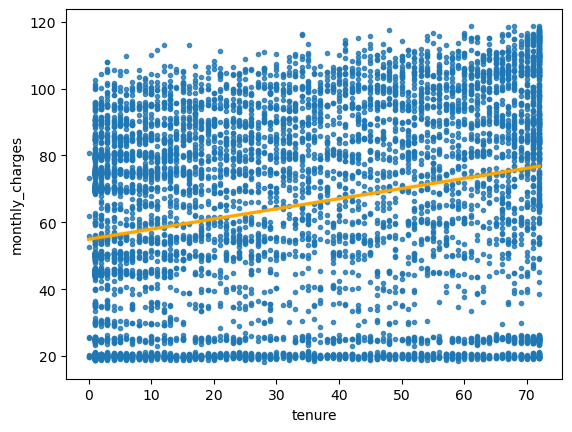

In [416]:
# Step 3: Plot Data

#tenure vs monthly charges
sns.regplot(x='tenure', y='monthly_charges', data= charges_df, marker='.', line_kws={'color': 'orange'})
plt.show()

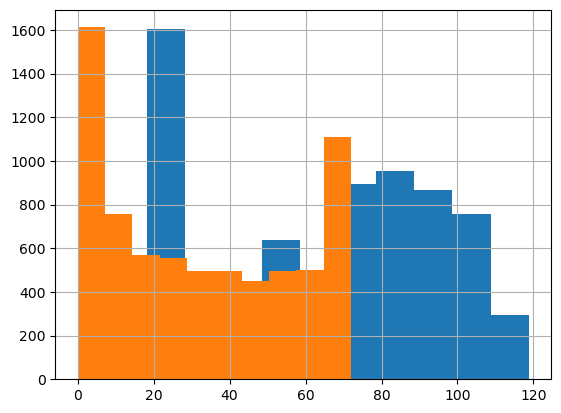

In [418]:
# Step 4: Test for Assumptions (distributions)

# visual test of distribution for monthly charges
charges_df.monthly_charges.hist()

# visual test of distribution for tenure
charges_df.tenure.hist()

plt.show()

In [363]:
#create a new function to check for normal distribution
def eval_dist(r, p, alpha=0.05):
    '''
    This function takes in r, p and alpha values
    then returns normal distribution print statement,
    if the p value is greater than alpha.
    Or not normal distribution print statement otherwise.
    '''
    if p > alpha:
        return print(f"""The data is normally distributed""")
    else:
        return print(f"""The data is NOT normally distributed""")

In [365]:
# Use a Shapiro Test to confirm normalcy.
from scipy.stats import shapiro

In [421]:
# for monthly_charges

# get r and p from stats.shapiro
r,p = stats.shapiro(df.monthly_charges)
print(r,p)

# use created function to evaluate distribution
eval_dist(r,p)

0.9208889007568359 0.0
The data is NOT normally distributed


/opt/homebrew/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [422]:
# for tenure

# get r and p from stats.shapiro
r,p = stats.shapiro(df.tenure)
print(r,p)

# use created function to evaluate distribution
eval_dist(r,p)

0.9037512540817261 0.0
The data is NOT normally distributed


/opt/homebrew/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Because tenure and monthly charges are NOT normally distributed, we annot use Pearson's R, but instead use Spearman's R.

In [423]:
# Step 5: Run stats tests
sr, sp = stats.spearmanr(charges_df.tenure, charges_df.monthly_charges)
sr, sp

(0.27641678933130215, 1.0271266876409408e-123)

In [434]:
# Step 6: Draw Conclusions


# create another function to evaluate the distribution when using a Spearman's R.
def eval_Sresult(r, p, alpha=0.05):
    '''
    This function evaluates our null hypothesis when using a Spearman's R Test
    '''
    if p < alpha:
        return print(f"""Reject the null hypothesis. There is a linear correlation.
Spearman's r: {r:2f}
P-value: {p}""")
    else:
        return print(f"""We fail to reject the null hypothesis that there is a linear correlation.
Spearman's r: {r:2f}
P-value: {p}""")

In [435]:
eval_Sresult(sr,sp)

Reject the null hypothesis. There is a linear correlation.
Spearman's r: 0.276417
P-value: 1.0271266876409408e-123


### Total charges?

Form hypotheses and set confidence level:\
$H_0$: There is no linear correlation between tenure and total charges.\
$H_a$: There is a linear correlation between tenure and total charges.

In [426]:
# Step 1: set alpha
alpha = 0.05

In [428]:
# Step 2: Select data and run .info

# create dataframe for tenure and total charges
ttl_charges_df = df[['tenure', 'total_charges']]

# look at df.info()
ttl_charges_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tenure         7043 non-null   int64 
 1   total_charges  7043 non-null   object
dtypes: int64(1), object(1)
memory usage: 110.2+ KB


In [429]:
# I need to clean my data to change object type'O' to float
ttl_charges_df['total_charges'] = ttl_charges_df['total_charges'].str.replace(' ', '0').astype('float')

/var/folders/kj/13f127m163l12181fcrgh1vm0000gn/T/ipykernel_96682/3715531691.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ttl_charges_df['total_charges'] = ttl_charges_df['total_charges'].str.replace(' ', '0').astype('float')


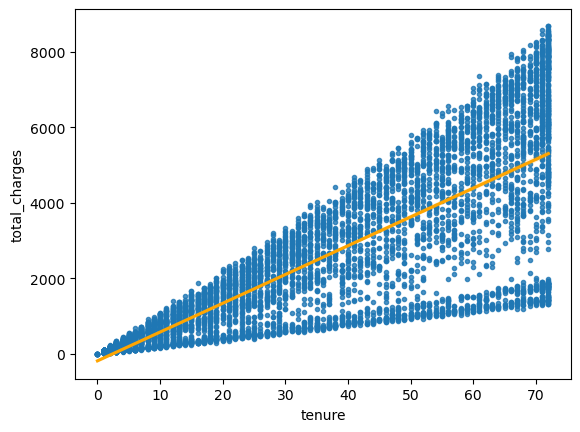

In [430]:
# Step 3: Plot data
sns.regplot(x='tenure', y = 'total_charges', data=ttl_charges_df, marker='.', line_kws={'color': 'orange'})
plt.show()

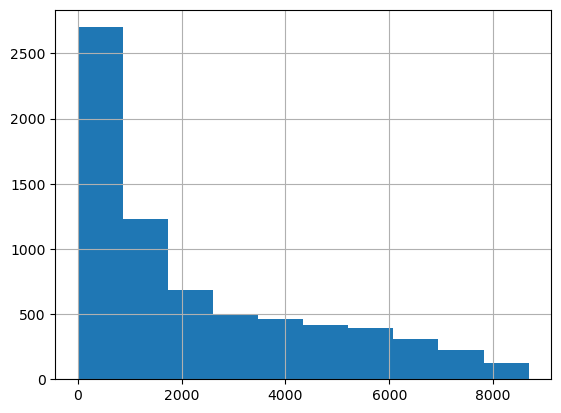

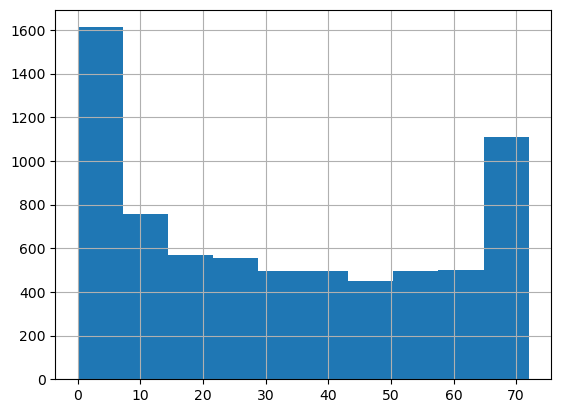

In [432]:
# Step 4: Test for Assumptions (distributions)

# total charges distribution
ttl_charges_df.total_charges.hist()
plt.show()

# tenure distribution
ttl_charges_df.tenure.hist()
plt.show()

In [433]:
# get r and p for total_charges to evaluate distribution
r, p = stats.shapiro(ttl_charges_df.total_charges)
print(r, p)

0.8601521253585815 0.0


/opt/homebrew/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [397]:
eval_dist(r,p)

The data is NOT normally distributed


In [436]:
# Step 5: Run stats tests

# Because our features are NOT normally distributed we must use Spearman's.
sr, sp = stats.spearmanr(ttl_charges_df.tenure, ttl_charges_df.total_charges)
sr, sp

(0.8896957900597577, 0.0)

In [438]:
# Step 6: Draw Conclusions
eval_Sresult(sr,sp)

Reject the null hypothesis. There is a linear correlation.
Spearman's r: 0.889696
P-value: 0.0


### What happens if you control for phone and internet service?

Form hypotheses and set confidence level:\
$H_0$: There is no linear correlation between tenure and monthly charges of phone and internet customers.\
$H_a$: There is a linear correlation between tenure and monthly charges of phone and internet customers.

In [439]:
# Step 1: Set alpha level
alpha = 0.05

In [442]:
# Step 2: Select data and run .info()

# create a df of only customers that have internet service type 1 and phone service
phone_df = df[(df.phone_service == 'Yes') & (df.internet_service_type_id == 1)][['monthly_charges','tenure']]
phone_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1739 entries, 0 to 7041
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   monthly_charges  1739 non-null   float64
 1   tenure           1739 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 40.8 KB


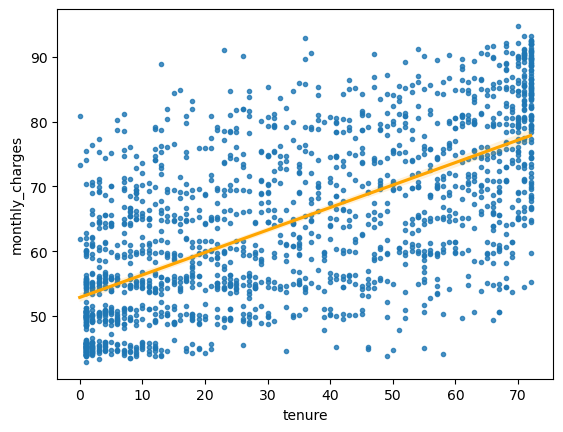

In [443]:
# Step 3: Plot data
sns.regplot(x='tenure', y = 'monthly_charges', data=phone_df, marker='.', line_kws={'color': 'orange'})
plt.show()

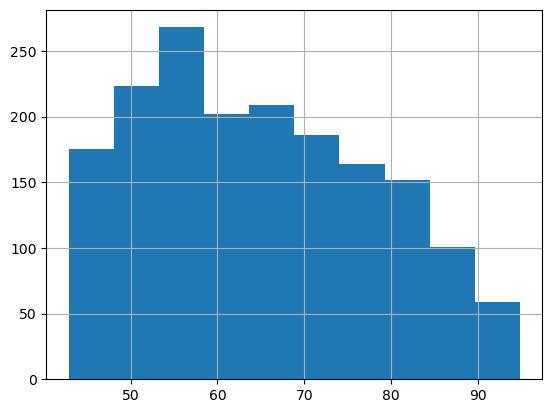

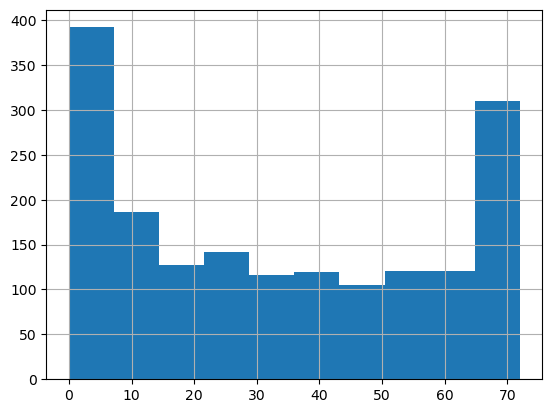

In [444]:
# Step 4: Test for Assumptions (distributions)

# monthly charges
phone_df.monthly_charges.hist()
plt.show()

# tenure
phone_df.tenure.hist()
plt.show()

In [446]:
# MONTHLY CHARGES distribution evaluation
# get r and p with stats.shapiro
r,p = stats.shapiro(phone_df.monthly_charges)
print(r,p)

# evaluate distribution with created function
eval_dist(r,p)

0.9584369659423828 7.019588771857106e-22
The data is NOT normally distributed


In [448]:
# TENURE distribution evaluation
# get r and p with stats.shapiro
r,p = stats.shapiro(phone_df.tenure)
print(r,p)

# evaluate distribution with created function
eval_dist(r,p)

0.8991788029670715 2.3523856297437335e-32
The data is NOT normally distributed


In [452]:
# Step 5: Run stats tests
sr, sp = stats.spearmanr(phone_df.tenure, phone_df.monthly_charges)
sr, sp

(0.6644708508462759, 5.423601644635052e-222)

In [454]:
# Step 6: Draw Conclusions
eval_Sresult(sr, sp)


# There is a moderate-strong positive correlation between tenure and monthly charges for customers that have both phone and internet service.

Reject the null hypothesis. There is a linear correlation.
Spearman's r: 0.664471
P-value: 5.423601644635052e-222


#### 3. Use the employees database.
- Is there a relationship between how long an employee has been with the company and their salary?
- Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [457]:
# Connect to employees database

# Write SQL query
query = '''
SELECT * 
FROM employees
JOIN salaries USING (emp_no)
WHERE to_date = '9999-01-01'
'''
# Create connection url
my_url = create_url('employees')
# Connect to sql and create dataframe
df = pd.read_sql(query, my_url)

In [460]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240124 entries, 0 to 240123
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   emp_no      240124 non-null  int64 
 1   birth_date  240124 non-null  object
 2   first_name  240124 non-null  object
 3   last_name   240124 non-null  object
 4   gender      240124 non-null  object
 5   hire_date   240124 non-null  object
 6   salary      240124 non-null  int64 
 7   from_date   240124 non-null  object
 8   to_date     240124 non-null  object
dtypes: int64(2), object(7)
memory usage: 16.5+ MB
None


,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,88958,2002-06-22,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,72527,2001-08-02,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,43311,2001-12-01,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,94692,2001-09-09,9999-01-01


Step 1: State Hypothesis:\
$H_0$: There is no linear correlation between salary and tenure.\
$H_a$: There is a linear correlation between salary and tenure.

In [461]:
# Step 1: set alpha
alpha = 0.05

In [462]:
# Step 2: Select Data and run .info()
# get tenure by subtracting hire_date from to_date
(df.to_date - df.hire_date)

0         2926512 days, 0:00:00
1         2926729 days, 0:00:00
2         2926449 days, 0:00:00
3         2926354 days, 0:00:00
4         2925338 days, 0:00:00
                  ...          
240119    2924120 days, 0:00:00
240120    2924958 days, 0:00:00
240121    2926578 days, 0:00:00
240122    2923846 days, 0:00:00
240123    2922337 days, 0:00:00
Length: 240124, dtype: object

In [467]:
# clean data and create tenure column
(df.to_date - df.hire_date).astype(str).str.split(' ', expand = True)

# create tenure column
df['tenure'] = (df.to_date - df.hire_date).astype(str).str.split(' ', expand = True)[0]
# change to 'int'
df.tenure = df.tenure.astype(int)
# create new df with just tenure and salary
tenure_df = df[['tenure', 'salary']]

tenure_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240124 entries, 0 to 240123
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   tenure  240124 non-null  int64
 1   salary  240124 non-null  int64
dtypes: int64(2)
memory usage: 3.7 MB


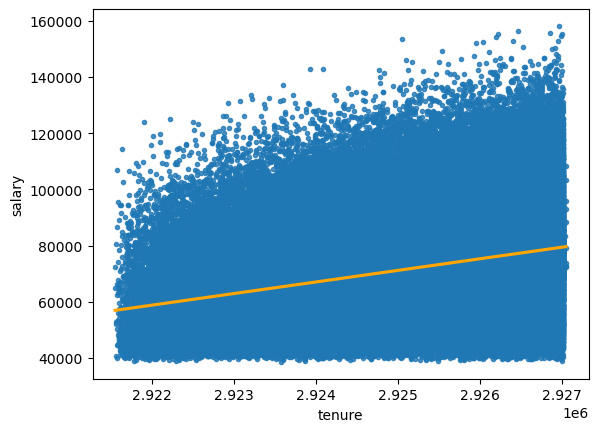

In [468]:
# Step 3: Plot data
sns.regplot(x='tenure', y = 'salary', data=tenure_df, marker='.', line_kws={'color': 'orange'})
plt.show()

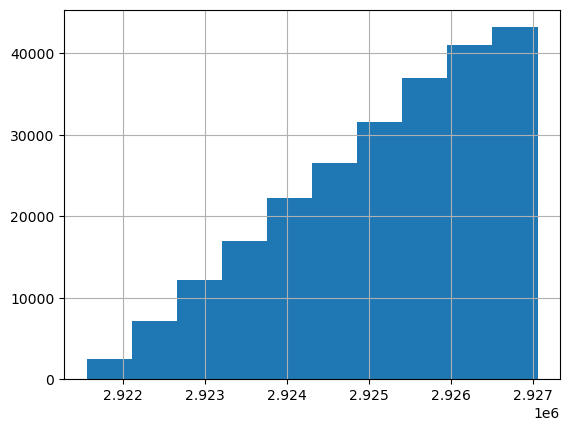

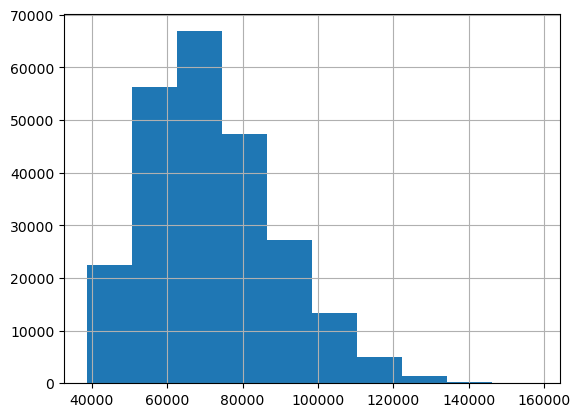

In [469]:
# Step 4: Test for Assumptions (distributions)
#distribution for tenure
tenure_df.tenure.hist()
plt.show()

#distribution for salary
tenure_df.salary.hist()
plt.show()

#### 4.Use the sleepstudy data.
- Is there a relationship between days and reaction time?
